#In this dataset we trying to predict heart attack probablity!
####Lets start...
#####Here is some hints about our dataset features:
#####1-cp: Chest pain
#####2-trestbps: resting_blood_presure
#####3-chol: Cholesterol
#####4-fbs: Fasting blood sugar
#####5-restecg: Resting electrocardiographic
#####6-thalach: The person's maximum heart rate achieved
#####7-exang: exercise induced angina
#####8-oldpeak: ST depression induced by exercise relative to rest
#####9-slope: The ST segment shift relative to exercise-induced increments in heart rate
#####10-ca: ....
#####11-thal: A blood disorder called thalassemia 

#Import our needed libraries
##Read our dataset and check our features

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MyFiles-Kaggle-AI/SVM/Untitled folder/heart (2).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

##As you see we have so clean dataset and it doesn't need to handle missing values 



---



##We want to visualize our data

<Axes: xlabel='target', ylabel='count'>

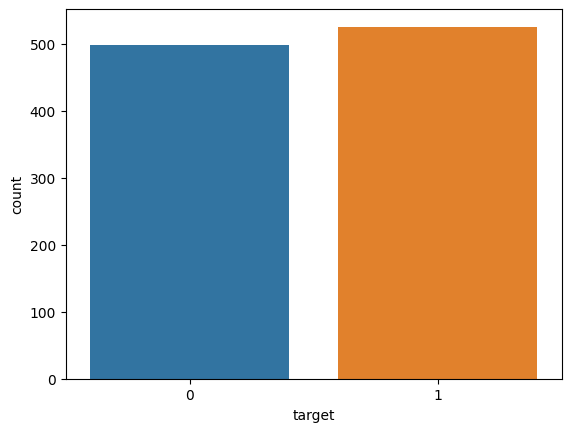

In [8]:
sns.countplot(x=df["target"])

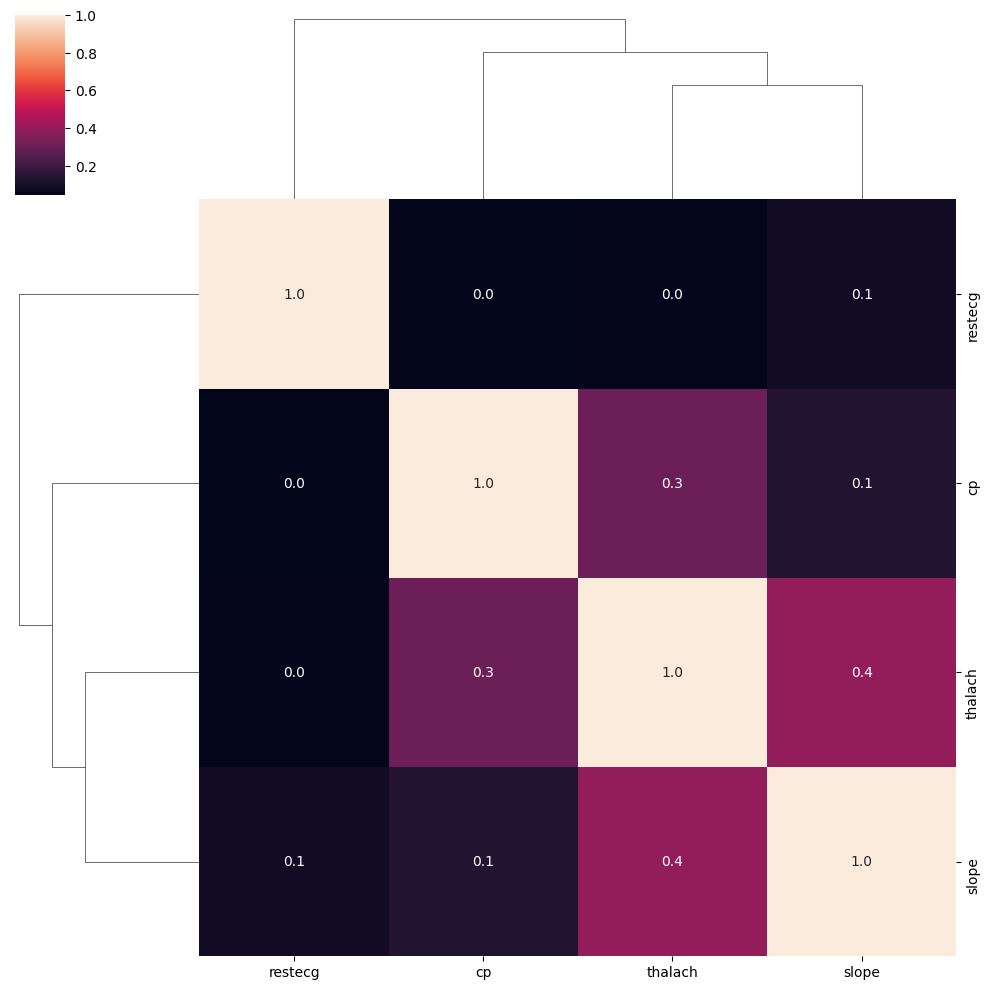

In [9]:
pos_corr = df[['cp', 'thalach', 'slope', 'restecg']]
sns.clustermap(pos_corr.corr() , annot=True , fmt='.1f')

In [10]:
sns.pairplot(df , kind="kde")

Output hidden; open in https://colab.research.google.com to view.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

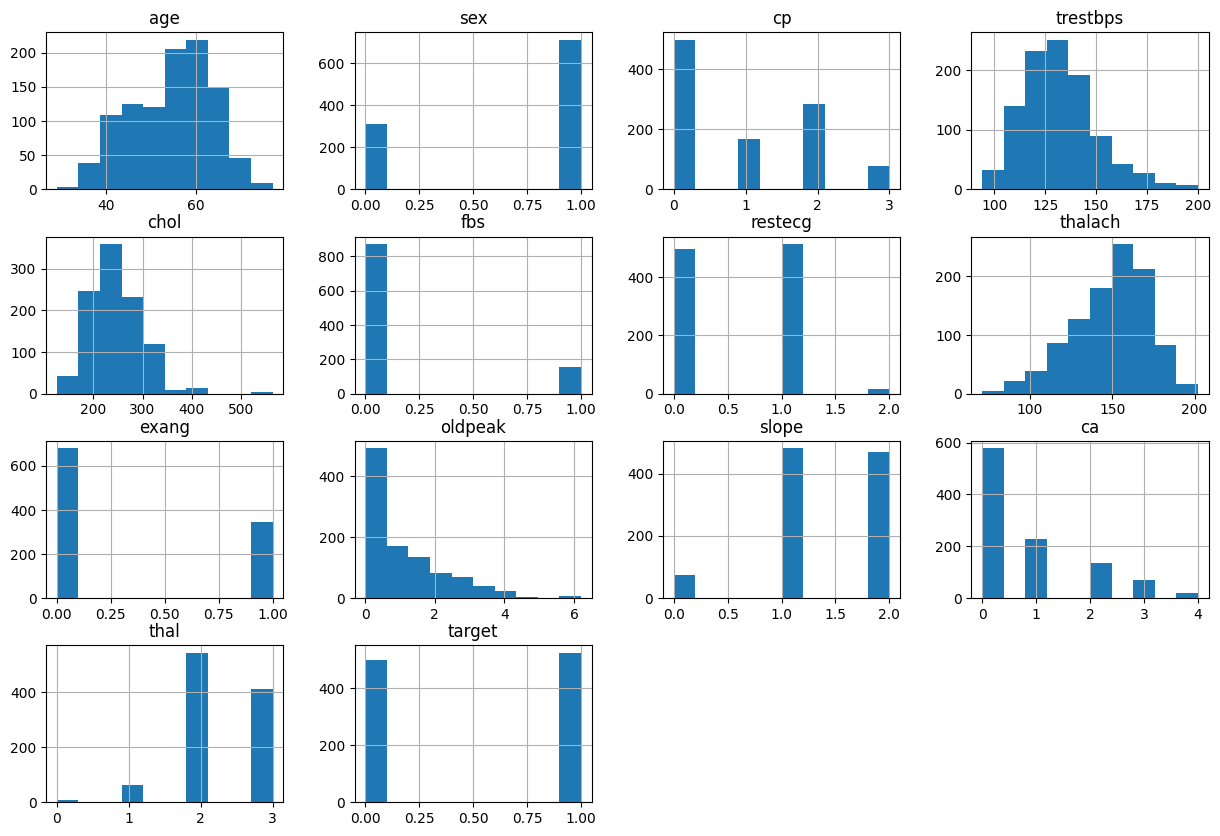

In [11]:
df.hist(figsize=(15, 10))

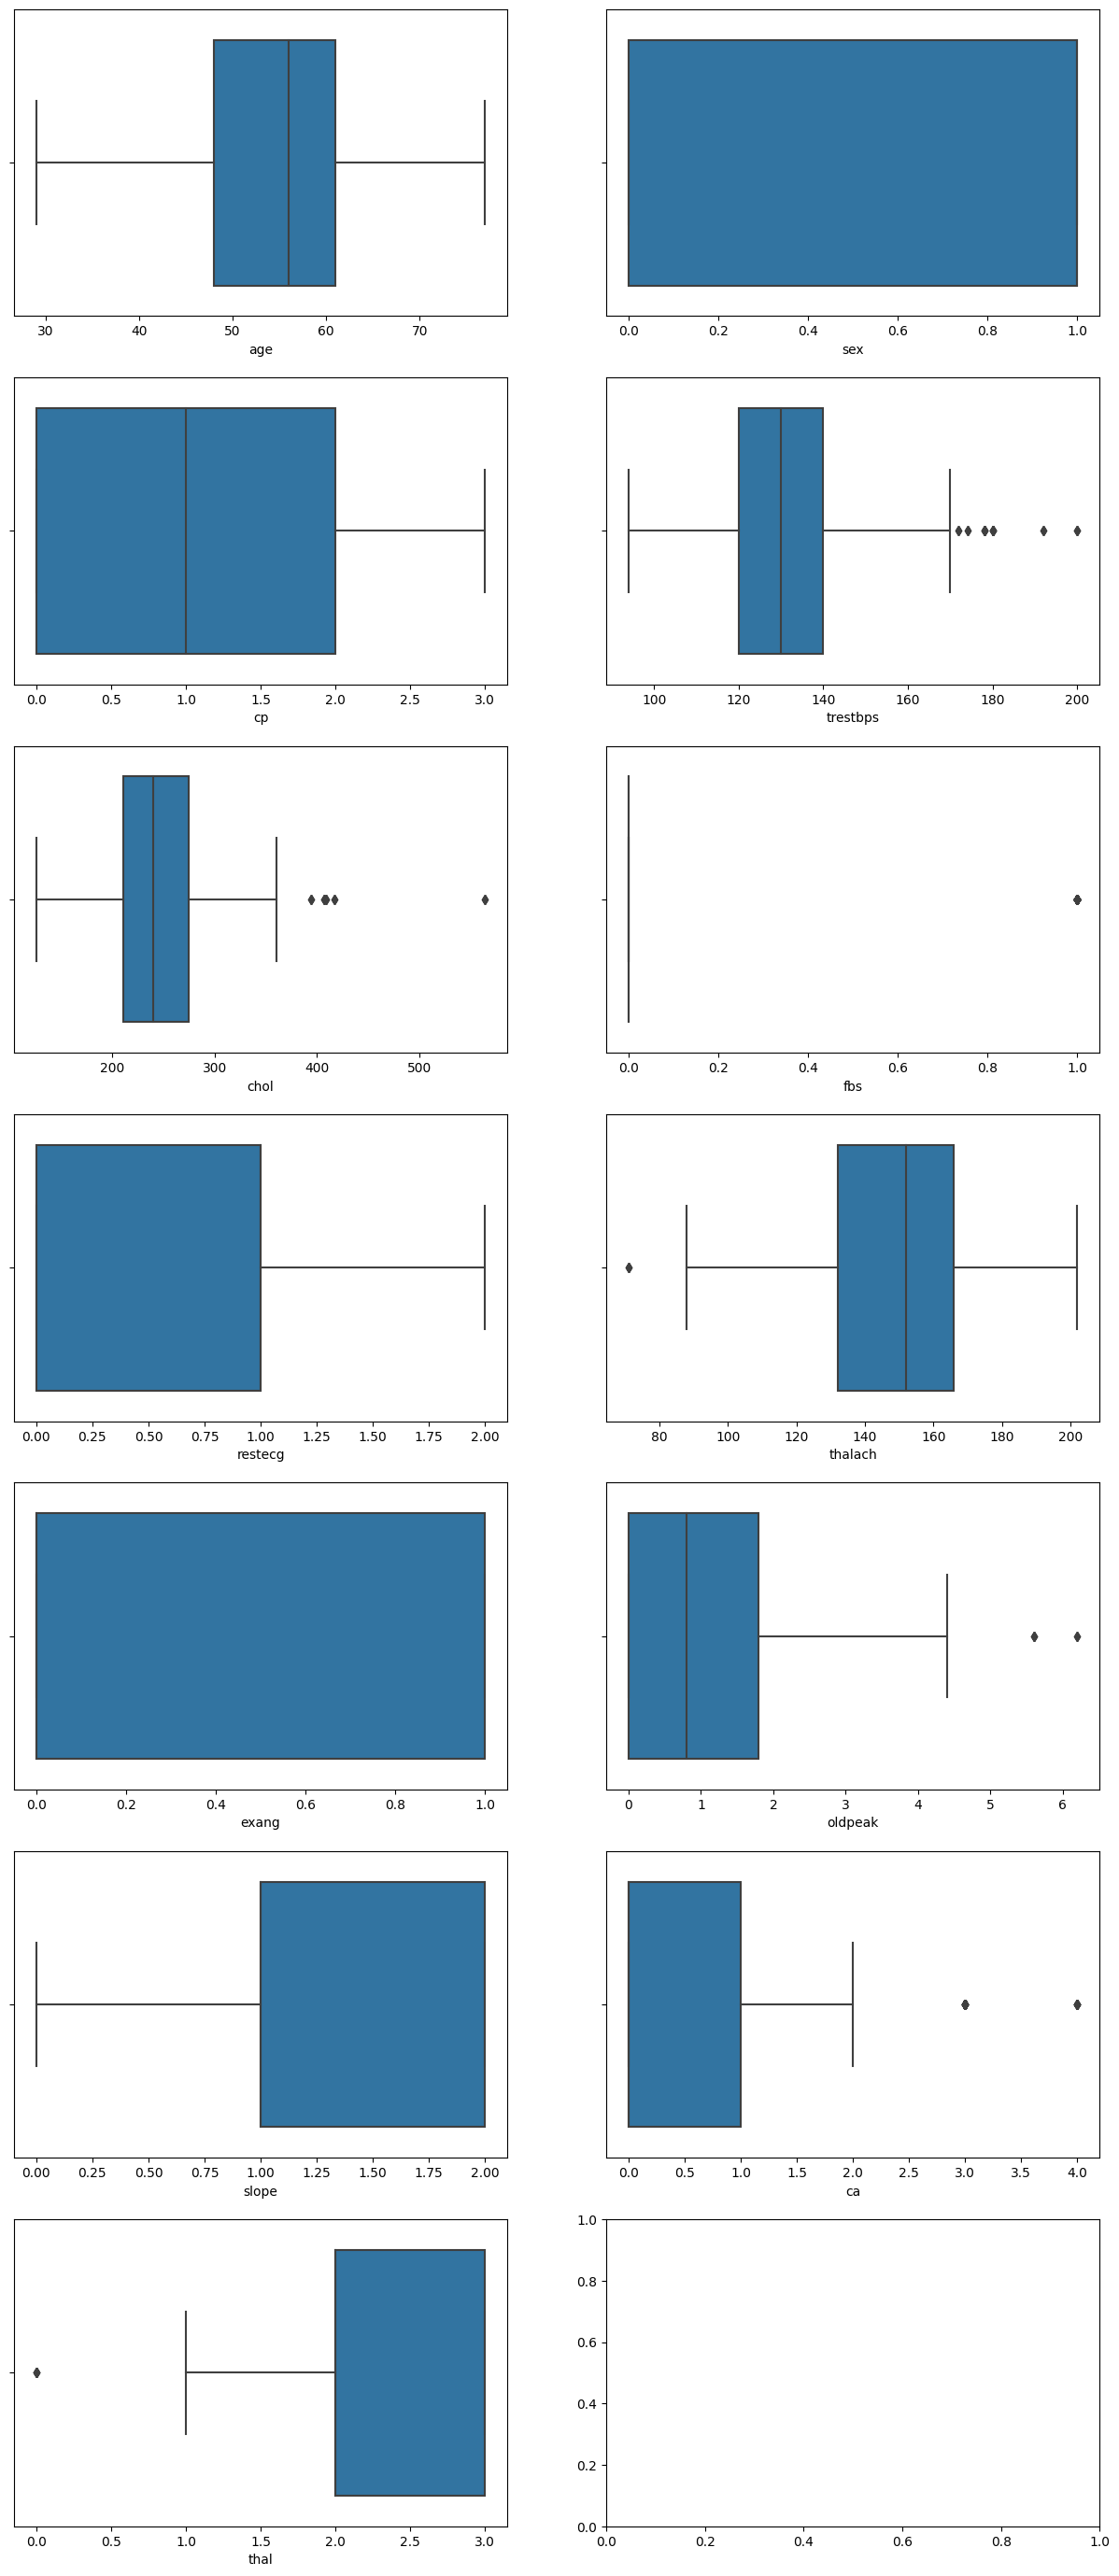

In [12]:
features = df.drop(['target'],  axis=1)
fig , ax = plt.subplots(nrows=7 , ncols=2 , figsize=(15,35))

for i , var in enumerate(features):
    x = i//2
    y = i%2
    sns.boxplot(data=df , x=var , ax=ax[x,y])

In [13]:
num_features = ['age', 'trestbps', 'thalach', 'oldpeak']
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

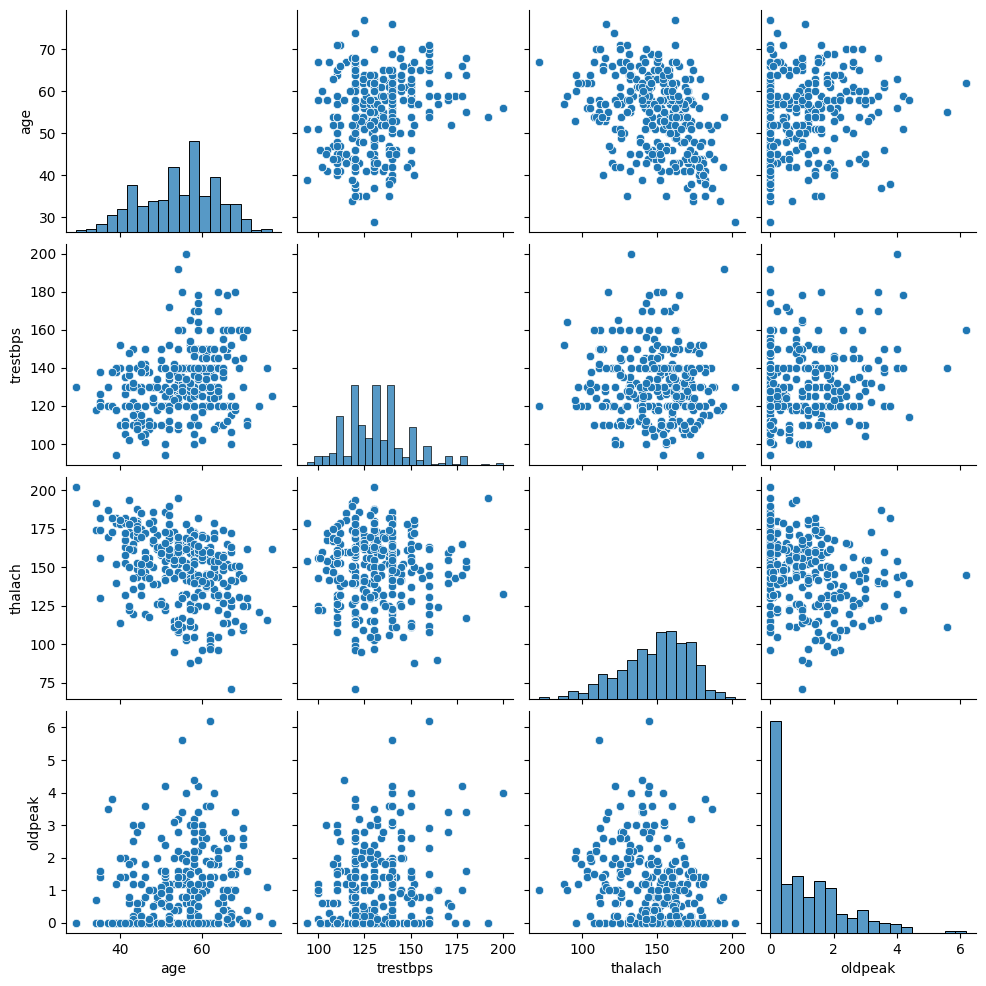

In [14]:
sns.pairplot(df[['age', 'trestbps', 'thalach', 'oldpeak']])

##we some kind of plot to know more details about our dataset
###Now we use builtin function of sklearn to find our dataset outliers and delet them

In [15]:
lof = LocalOutlierFactor(n_neighbors=20)
df['lof_score'] = lof.fit_predict(df[num_features])
outliers = df[df['lof_score'] == -1]

print(f"Found {len(outliers)} outliers at indices {outliers.index.tolist()}")

df.drop('lof_score' , axis=1 , inplace=True)

Found 27 outliers at indices [60, 64, 118, 140, 151, 160, 162, 173, 175, 223, 246, 267, 294, 296, 326, 356, 378, 387, 442, 508, 558, 559, 587, 620, 668, 682, 688]


In [16]:
df.drop([60, 64, 118, 140, 151, 160, 162, 173, 175, 223, 246, 267, 294, 296, 326, 356, 378, 387, 442, 508, 558, 559, 587, 620, 668, 682, 688])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [17]:
scaler = StandardScaler()

In [18]:
df[num_features] = scaler.fit_transform(df[num_features])

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,212,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,203,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,174,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,203,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,294,1,1,-1.874977,0,0.705408,1,3,2,0


In [20]:
X = df.drop('target', axis=1)
Y = df['target']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

In [22]:
model = SVC(kernel='linear', )
model.fit(x_train, y_train)

SVC(kernel='linear')

In [23]:
y_pred = model.predict(x_test)

In [24]:
print('accuracy of model: ', accuracy_score(y_test, y_pred))

accuracy of model:  0.8506493506493507


In [25]:
confusion_matrix(y_test, y_pred)

array([[120,  36],
       [ 10, 142]])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       156
           1       0.80      0.93      0.86       152

    accuracy                           0.85       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308



###I hope this notebook be helpfull for our AI world
#Arad Rahmani
